In [2]:
import sympy as sp
import numpy as np

In [3]:
sp.init_printing()
sp.init_session(quiet=True)

# Writing down equations for derivative Kim-Sharpe

In [3]:
x, omega, alpha, omega_star, r_sq, gamma, beta, k_par, k_perp, d, m = sp.symbols('x omega alpha omega_star r_sq gamma beta k_par k_perp d m')

r_sq


r_sq

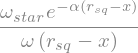

In [69]:
summand = (omega_star/omega) * sp.exp(-alpha * (r_sq-x))/(r_sq-x)
summand

In [70]:
#omega_star
substitution_1 = gamma*(omega - beta * k_par)
substitution_1

In [71]:
#r_sq
substitution_2 = gamma**2*(k_par - beta * omega)**2 +k_perp**2
substitution_2

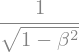

In [72]:
#gamma
substitution_3 = 1/sp.sqrt(1-beta**2)
substitution_3

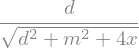

In [73]:
#beta
substitution_4 = d/sp.sqrt(m**2 + d**2 + 4*x)
substitution_4

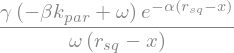

In [74]:
summand = summand.subs(omega_star, substitution_1)
summand

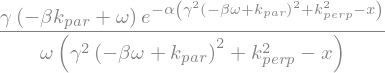

In [75]:
summand = summand.subs(r_sq, substitution_2)
summand

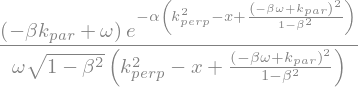

In [76]:
summand = summand.subs(gamma, substitution_3)
summand

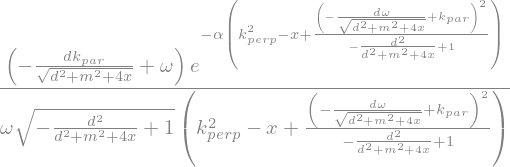

In [77]:
summand = summand.subs(beta, substitution_4)
summand

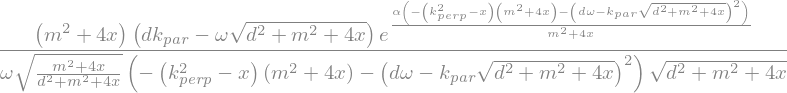

In [78]:
sp.simplify(summand)

In [79]:
deriv_summand = sp.diff(summand, x)

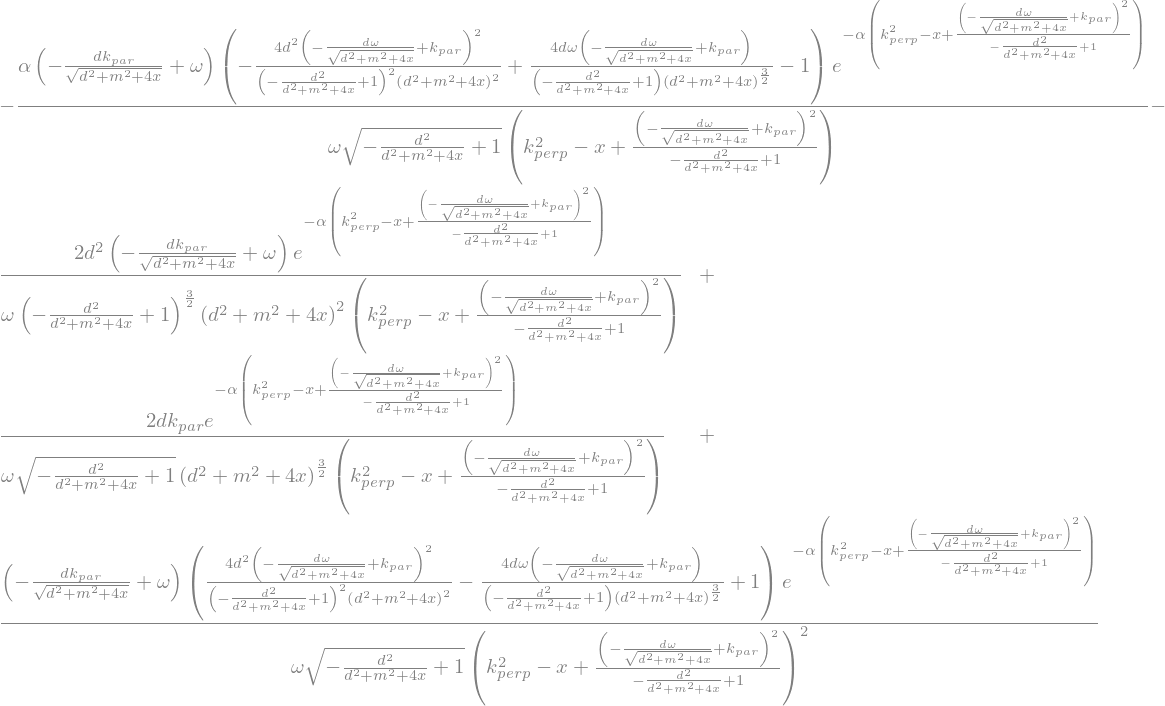

In [80]:
deriv_summand

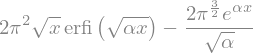

In [81]:
pv = 2*(sp.pi**2)*sp.sqrt(x)\
        * sp.erfi(sp.sqrt(alpha*x))\
        - 2*sp.exp(alpha*x)\
        * sp.sqrt(sp.pi**3)/sp.sqrt(alpha)
pv

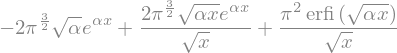

In [82]:
deriv_pv= sp.diff(pv,x)
deriv_pv


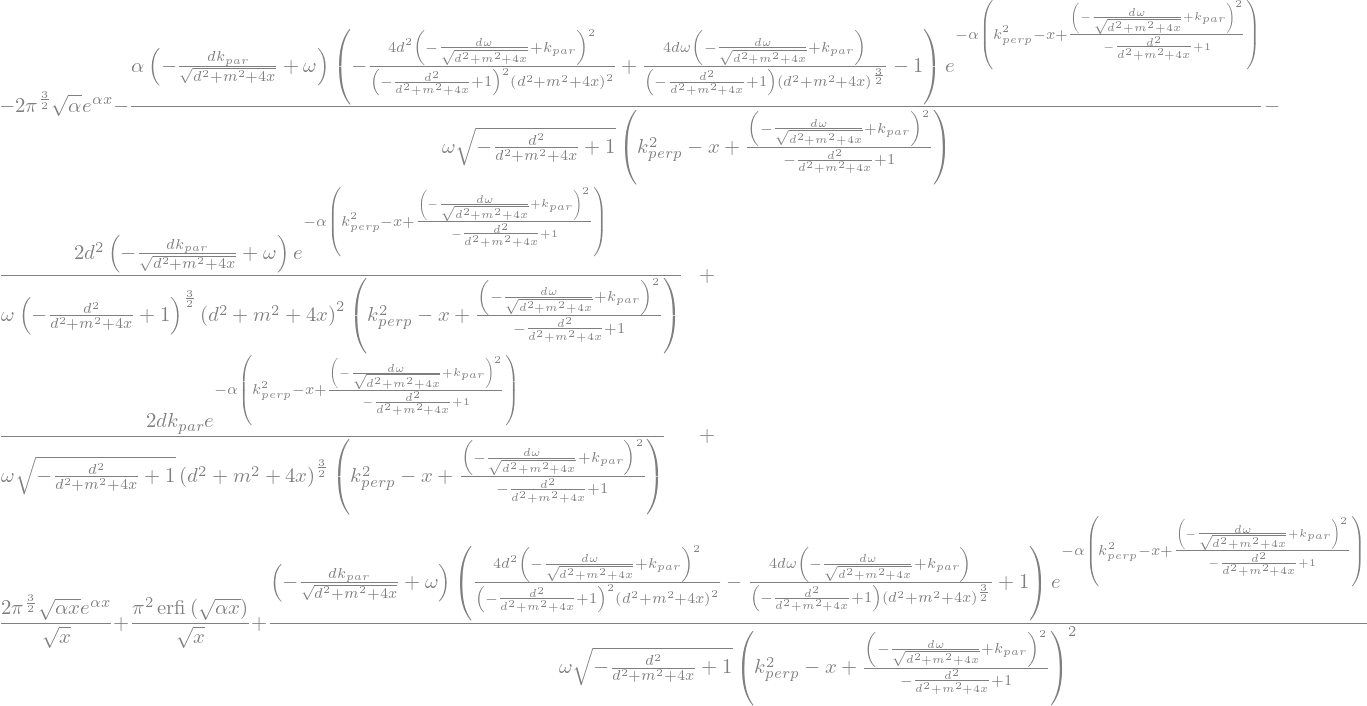

In [83]:
deriv = deriv_summand + deriv_pv
deriv

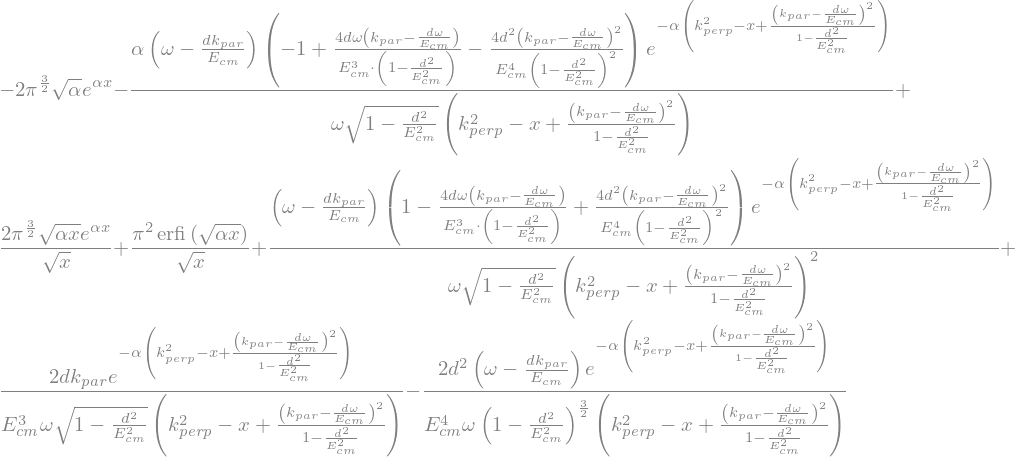

In [90]:
E_cm = sp.symbols('E_cm')

a =deriv.subs(sp.sqrt(d**2+m**2+4*x), E_cm)
a

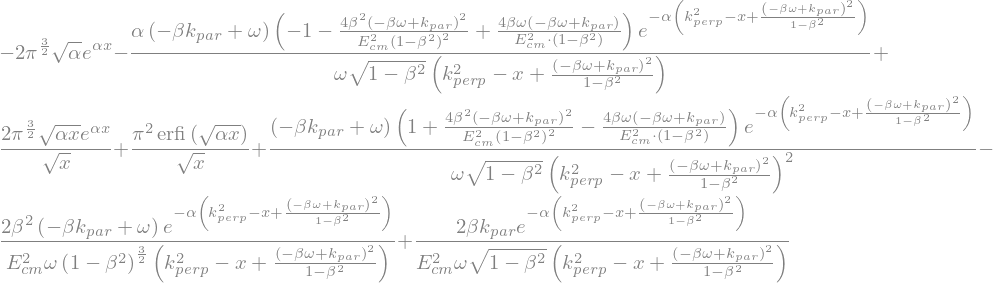

In [93]:
b = a.subs(d/E_cm, beta)
b

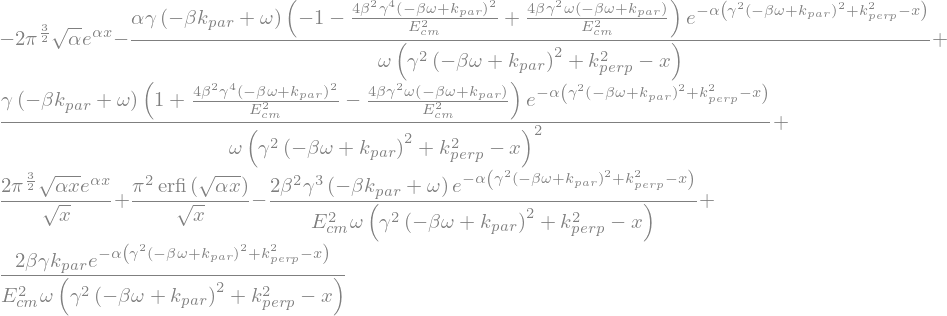

In [95]:
c = b.subs(1/sp.sqrt(1-beta**2), gamma)
c

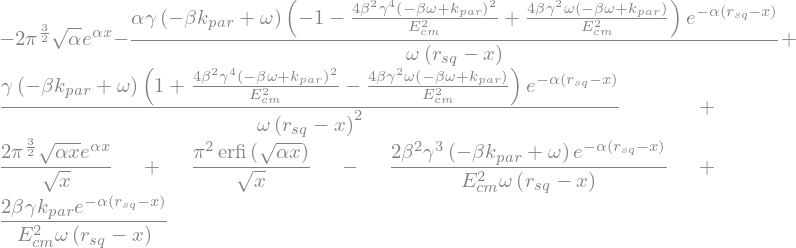

In [96]:
c.subs(substitution_2, r_sq)

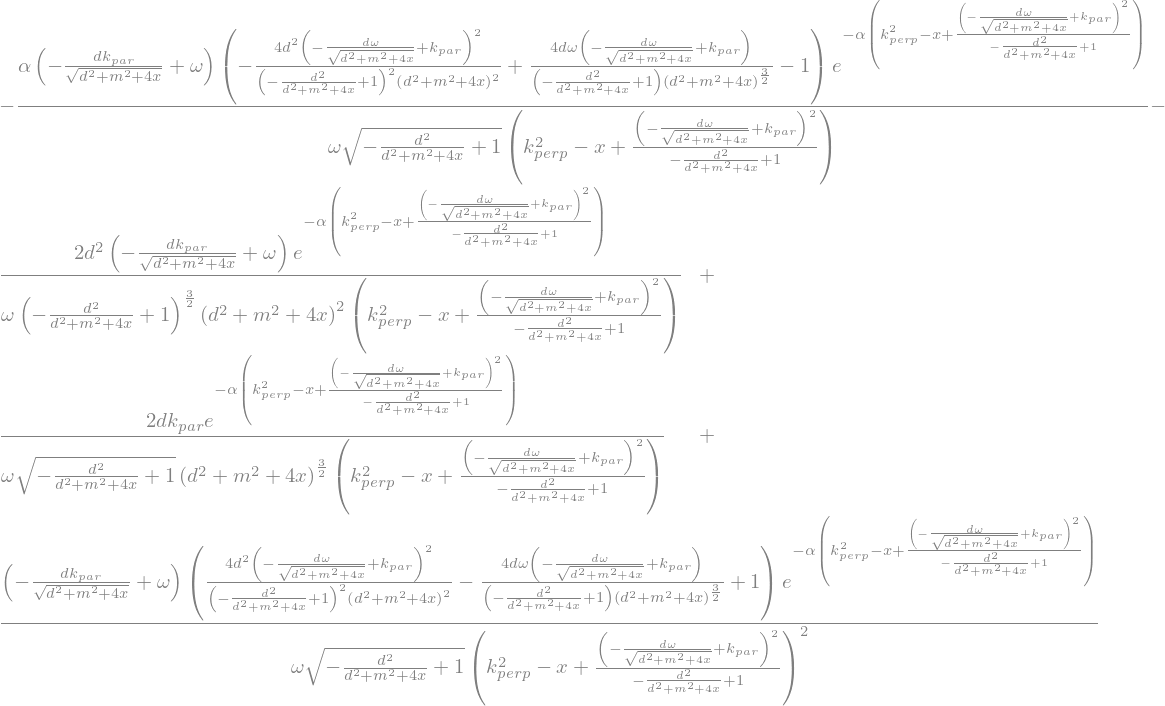

In [147]:
sp_x, sp_omega, sp_alpha, sp_omega_star, sp_r_sq, sp_gamma, sp_beta, sp_k_par, sp_k_perp, sp_d, sp_m = sp.symbols('x omega alpha omega_star r_sq gamma beta k_par k_perp d m')

summand = (sp_omega_star/sp_omega) * sp.exp(-sp_alpha * (sp_r_sq-sp_x))/(sp_r_sq-sp_x)
substitution_1 = sp_gamma*(sp_omega - sp_beta * sp_k_par)
substitution_2 = sp_gamma**2*(sp_k_par - sp_beta * sp_omega)**2 + sp_k_perp**2
substitution_3 = 1/sp.sqrt(1-sp_beta**2)
substitution_4 = sp_d/sp.sqrt(sp_m**2 + sp_d**2 + 4*sp_x)
summand = summand.subs(sp_omega_star, substitution_1)
summand = summand.subs(sp_r_sq, substitution_2)
summand = summand.subs(sp_gamma, substitution_3)
summand = summand.subs(sp_beta, substitution_4)
deriv_summand = sp.diff(summand, sp_x)
pv = 2*(sp.pi**2)*sp.sqrt(sp_x)\
        * sp.erfi(sp.sqrt(sp_alpha*sp_x))\
        - 2*sp.exp(sp_alpha*sp_x)\
        * sp.sqrt(sp.pi**3)/sp.sqrt(sp_alpha)
deriv_pv= sp.diff(pv,sp_x)

# sp_E_cm = sp.symbols('E_cm')
# deriv_summand = deriv_summand.subs(sp.sqrt(sp_d**2+sp_m**2+4*sp_x), sp_E_cm)
# deriv_summand = deriv_summand.subs(sp_d/sp_E_cm, sp_beta)
# deriv_summand = deriv_summand.subs(1/sp.sqrt(1-sp_beta**2), sp_gamma)
# deriv_summand = deriv_summand.subs(substitution_2, sp_r_sq)
deriv_summand
deriv_pv
f_pv = sp.lambdify((sp_x, sp_alpha), deriv_pv, 'scipy')
deriv_summand


In [127]:
f_pv(1,1)

In [117]:
from scipy.special import erfi
print(erfi(1))

1.6504257587975428


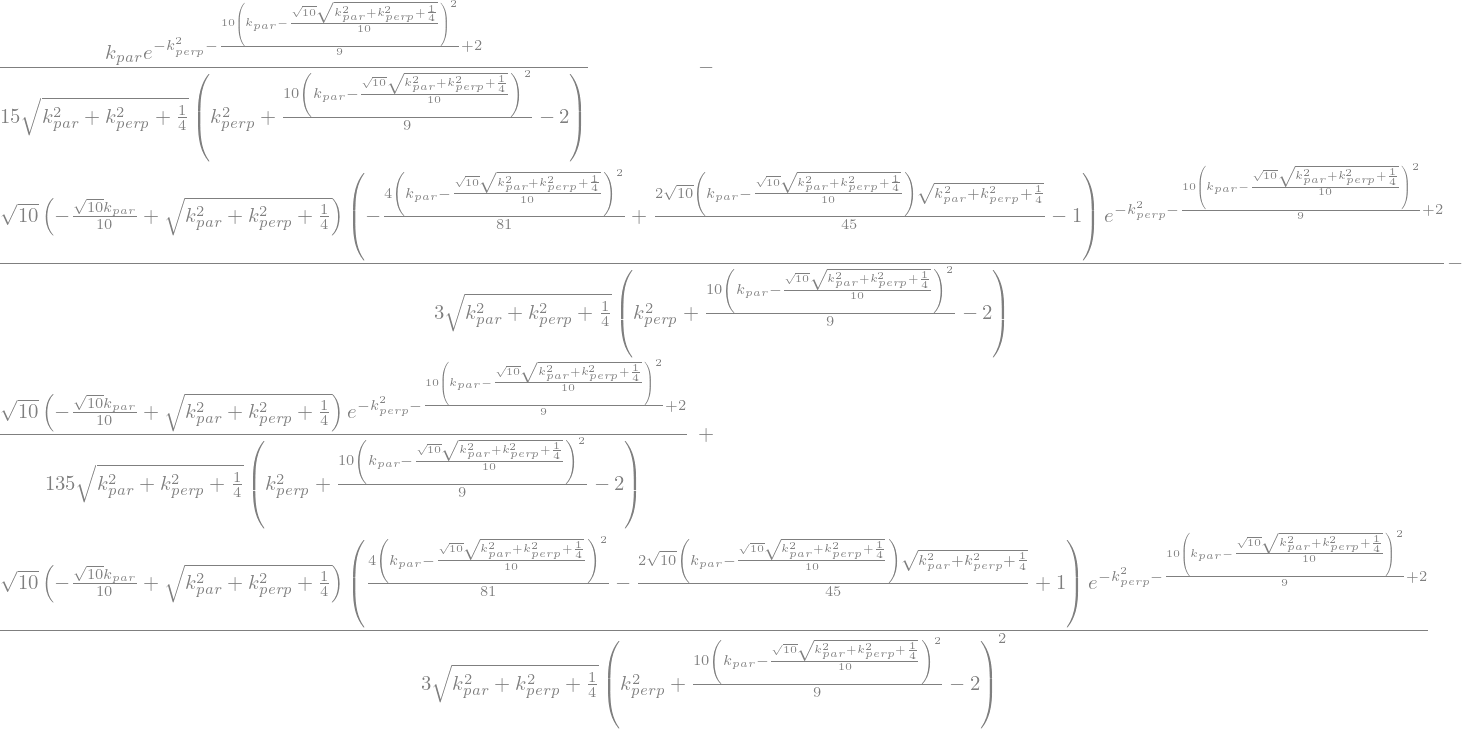

In [178]:

d = 0
x = 2
alpha = 1
m = 1

expr = sp.sqrt(sp_k_perp**2 + sp_k_par**2 + sp.Rational(1,4)*sp_m**2)
deriv_summand = deriv_summand.subs(sp_omega, expr)
deriv_summand = deriv_summand.subs([(sp_x, x), (sp_d,d), (sp_m,m), (sp_alpha, alpha)])
expr
deriv_summand

In [179]:
f = sp.lambdify(( sp_k_par,sp_k_perp), deriv_summand, 'numpy')

f(0.5,0.5) - f_pv(2,alpha)

In [180]:
1/(0.5**2+0.5**2-2)

AttributeError: module 'sympy' has no attribute 'symbolsToDelete'

In [4]:
pv = 2*(sp.pi**2)*sp.sqrt(x)\
        * sp.erfi(sp.sqrt(alpha*x))\
        - 2*sp.exp(alpha*x)\
        * sp.sqrt(sp.pi**3)/sp.sqrt(alpha)

pv

2*pi**2*sqrt(x)*erfi(sqrt(alpha*x)) - 2*pi**(3/2)*exp(alpha*x)/sqrt(alpha)

In [5]:
diff_pv = sp.diff(pv, x)
diff_pv

-2*pi**(3/2)*sqrt(alpha)*exp(alpha*x) + 2*pi**(3/2)*sqrt(alpha*x)*exp(alpha*x)/sqrt(x) + pi**2*erfi(sqrt(alpha*x))/sqrt(x)

In [10]:
sp.collect(sp.simplify(diff_pv),x)

(-2*pi**(3/2)*sqrt(alpha)*sqrt(x)*exp(alpha*x) + 2*pi**(3/2)*sqrt(alpha*x)*exp(alpha*x) + pi**2*erfi(sqrt(alpha*x)))/sqrt(x)

In [185]:
from scipy.special import erfi



In [192]:
dx = 1e-9

print((erfi(1+dx)-erfi(1))/dx)

print(np.exp(1)*2/np.sqrt(np.pi))

3.0672531181608065
3.0672525855274846


In [193]:
def zeta_pv(q_2=1.5, alpha=1):
    ttmp = 2.0*(np.pi**2)*np.sqrt(q_2)\
        * erfi(np.sqrt(alpha*q_2))\
        - 2.0*np.exp(alpha*q_2)\
        * np.sqrt(np.pi**3)/np.sqrt(alpha)
    
    return ttmp/np.sqrt(4*np.pi)

In [199]:
x, omega, alpha, omega_star, r_sq, gamma, beta, k_par, k_perp, d, m = sp.symbols('x omega alpha omega_star r_sq gamma beta k_par k_perp d m')


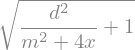

In [200]:
gamma  = sp.sqrt(1+d**2/(m**2+4*x))
gamma

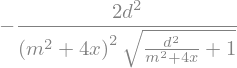

In [201]:
sp.diff(gamma, x)

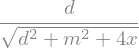

In [203]:
beta = d/sp.sqrt(m**2+4*x + d**2)
beta

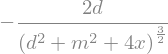

In [204]:
sp.diff(beta, x)

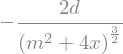

In [206]:
sp.diff(d/sp.sqrt(m**2+4*x ), x)